# Import Libraries


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model

# Generating the Dataset


In [51]:
list_xx = []
list_yy = []
size = 5000

for i in range (size):

  x = np.random.randint(-20, 20)
  y = 5*x**3-68*x**2-7*x+1

  list_xx.append(x)
  list_yy.append(y)


# Normalizing the data

In [52]:
max_x = max(list_xx)
x_list = [x / max_x for x in list_xx]

max_y = max(list_yy)
y_list = [y / max_y for y in list_yy]



# Spliting the Dataset into Training , validation & Testing

In [53]:
lenght1 = int(len(x_list)*.9)
lenght2 = int(len(x_list)*.95)

# training  dataset
x_train = x_list [:lenght1]
y_train = y_list [:lenght1]

# validation dataset
x_val = x_list [lenght1 : lenght2]
y_val = y_list [lenght1 : lenght2]

# testing dataset
x_test = x_list[lenght2:]
y_test = y_list[lenght2:]


# Design DNN model

In [66]:
inputs = layers.Input((1,))

x = layers.Dense(32, activation = 'relu')(inputs)
x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dense(128,activation = 'relu')(x)

outputs = layers.Dense(1,)(x)

model = Model(inputs, outputs, name = 'Simple_DNN_model')
model.summary()


Model: "Simple_DNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_27 (Dense)            (None, 32)                64        
                                                                 
 dense_28 (Dense)            (None, 64)                2112      
                                                                 
 dense_29 (Dense)            (None, 128)               8320      
                                                                 
 dense_30 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile and Training the Model

In [55]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.R2Score(name='accuracy')]
)

trained_model = model.fit(x_train, y_train, epochs=10,validation_data=(x_val,y_val))



Epoch 1/10
141/141 [==============================] - 2s 4ms/step - loss: 1.1383 - accuracy: 0.6776 - val_loss: 0.0740 - val_accuracy: 0.9810
Epoch 2/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9922 - val_loss: 0.0099 - val_accuracy: 0.9975
Epoch 3/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0033 - val_accuracy: 0.9991
Epoch 4/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 5/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 8.8030e-04 - val_accuracy: 0.9998
Epoch 6/10
141/141 [==============================] - 0s 2ms/step - loss: 6.0732e-04 - accuracy: 0.9998 - val_loss: 3.7929e-04 - val_accuracy: 0.9999
Epoch 7/10
141/141 [==============================] - 0s 2ms/step - loss: 3.7207e-04 - accuracy: 0.9999 - val_loss: 4.8139e-04 - val_acc

# plotting the training accuracy vs validation accuracy

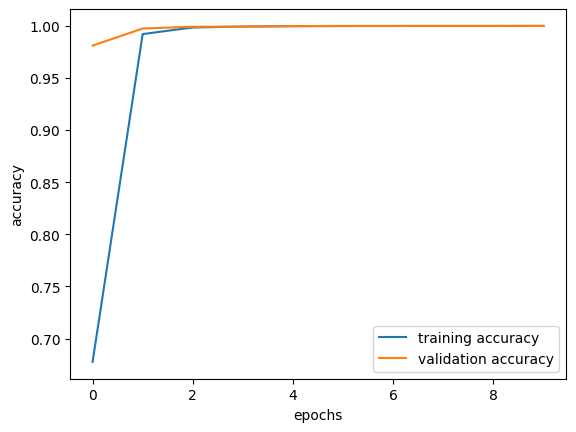

In [68]:
history = trained_model.history


plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy','validation accuracy'])


#  plotting training error vs validation error curves

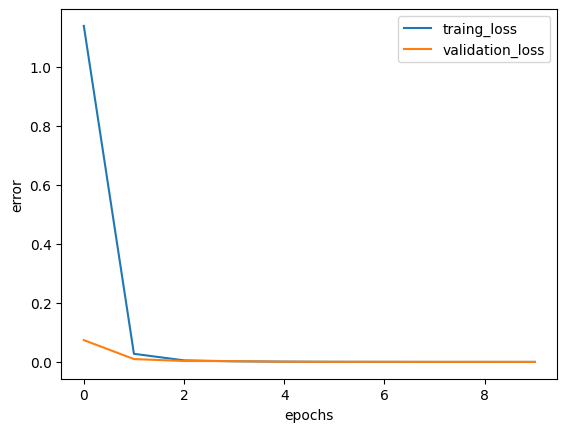

In [60]:
history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend(['traing_loss','validation_loss'])

# After training, using the test data for prediction

In [62]:
predicted_data = model.predict(x_test)


8/8 [==============================] - 0s 2ms/step


# prediction accuracy vs true levels of the test data

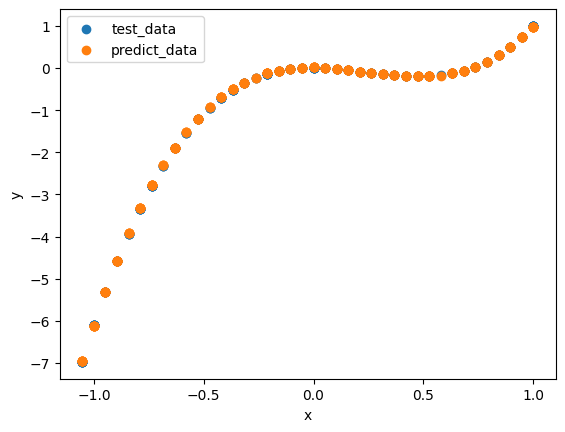

In [67]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, predicted_data)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['test_data','predict_data'])
